<a href="https://colab.research.google.com/github/CindyMG/CoreW4/blob/main/Core_W4_IP_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing python libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading our dataset

In [81]:
# We will then load our Excel dataset so as to begin our analysis:
Autolib_df = pd.read_csv('/content/Autolib_dataset .csv')
Autolib_df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


# Checking our dataset

In [82]:
Autolib_df.shape

(5000, 25)

In [83]:
Autolib_df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


#Cleaning our dataset

1. Removing null values

In [84]:
# let us check for any null values or missing data
#
Autolib_df.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [85]:
# now that we have identified the missing values, we will now drop them
# since we only have null values in the columns 'Displayed comment' and 'Scheduled at',
# we will drop only those two columns
#
Autolib_df.drop(['Displayed comment','Scheduled at'], axis=1, inplace=True)
Autolib_df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [86]:
# confirming the number of records we have left after cleaning out the null values
Autolib_df.shape

(5000, 23)

In [87]:
#confirming that we have no missing values
#
Autolib_df.isnull().any()
# Great! Now we have no null values!

Address                False
Cars                   False
Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
Charge Slots           False
Charging Status        False
City                   False
ID                     False
Kind                   False
Geo point              False
Postal code            False
Public name            False
Rental status          False
Slots                  False
Station type           False
Status                 False
Subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
dtype: bool

2. Dealing with outliers

In [88]:
# let us check out the descriptive statistics
#
Autolib_df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [89]:
# next, we will create a boxplot to visualize the outliers in our data
# let us define the function , 'plot_boxplot'
#
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

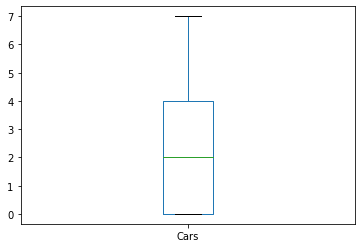

In [90]:
#now that we have defined the function, let us call it
#for the column 'Cars'
plot_boxplot(Autolib_df, "Cars")

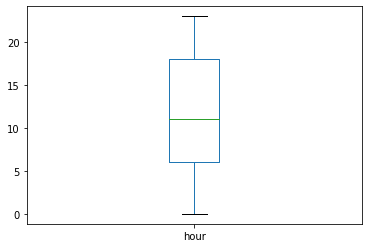

In [91]:
#for the column 'hour'
plot_boxplot(Autolib_df, "hour")

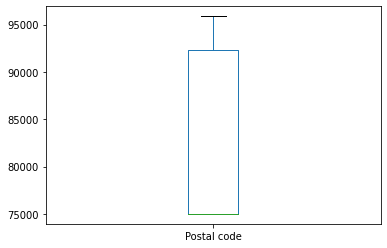

In [92]:
#for the column 'Postal code'
plot_boxplot(Autolib_df, "Postal code")

From our visualizations above, we can see that our dataset has no outliers. Now, we can move on to analysis.

#Univariate analysis

Measures of central tendency

**Cars**

In [93]:
# we are going to be investigating the characteristics of the field 'Cars'
# displaying the general descriptive statistics
#
Autolib_df["Cars"].describe()

# the advantage of this function is that it indicates the mean, median, 
#the 3 quantile values, the max and min values, the standard deviation and a count of all the values

count    5000.000000
mean        2.333600
std         2.035274
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: Cars, dtype: float64

In [94]:
# displaying the mode
Autolib_df["Cars"].mode()

0    0
dtype: int64

Now, we're going to describe the measures of dispersion/variability that are not included in the describe function.

In [95]:
# displaying the range
# by finding the difference between the max and min values
df_max = Autolib_df["Cars"].max()
df_min = Autolib_df["Cars"].min()
df_max - df_min

7

In [96]:
# displaying the variance
Autolib_df["Cars"].var()

4.1423395079017675

In [97]:
#displaying the kurtosis

Autolib_df["Cars"].kurt()
# a negative kurtosis indicates we have a platykurtic distribution!

-1.143859849398025

In [98]:
# displaying the skewness of our data

Autolib_df["Cars"].skew()

0.3515003655805394

Creating a frequency table

In [99]:
# now, let us study the variable 'Cars' more closely
# let us create a frequency table for this variable
Autolib_df.Cars.value_counts()

0    1447
3     672
1     663
4     636
2     628
5     574
6     341
7      39
Name: Cars, dtype: int64

**Hour**

In [100]:
# we are going to be investigating the characteristics of the field 'hour'
# displaying the general descriptive statistics
#
Autolib_df["hour"].describe()

count    5000.000000
mean       11.509200
std         6.893549
min         0.000000
25%         6.000000
50%        11.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

In [101]:
# displaying the mode
Autolib_df["hour"].mode()

0    21
dtype: int64

In [102]:
# displaying the range
# by finding the difference between the max and min values
df_max = Autolib_df["hour"].max()
df_min = Autolib_df["hour"].min()
df_max - df_min

23

In [103]:
# displaying the variance
Autolib_df["hour"].var()

47.52101956391169

In [104]:
#displaying the kurtosis

Autolib_df["hour"].kurt()
# a negative kurtosis indicates we have a platykurtic distribution!

-1.2077893891075497

In [105]:
# displaying the skewness of our data

Autolib_df["hour"].skew()

0.007551136647628182

Creating a frequency table

In [106]:
# now, let us study the variable 'hour' more closely
# let us create a frequency table for this variable
Autolib_df.hour.value_counts()

21    237
9     221
16    220
7     219
6     219
3     218
2     218
13    213
8     211
5     211
11    210
18    210
19    208
14    207
20    202
23    201
12    200
15    200
4     199
17    198
22    196
1     194
10    194
0     194
Name: hour, dtype: int64

In [107]:
# now, let us study the variable 'Day' more closely
# let us create a frequency table for this variable
Autolib_df.day.value_counts()

5    584
1    584
3    583
9    578
4    576
8    551
2    545
6    542
7    457
Name: day, dtype: int64

#Bivariate analysis

**Scatterplot comparing hour (of the day) and cars** 

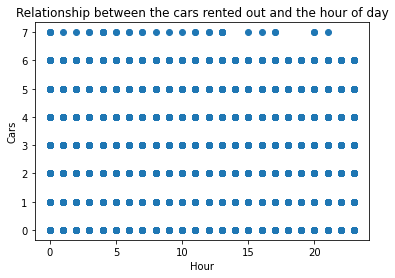

In [108]:
plt.scatter(Autolib_df['hour'], Autolib_df['Cars'])

# Giving our scatterplot a title
plt.title('Relationship between the cars rented out and the hour of day')

# Labelling our x axis
plt.xlabel('Hour')

# Labelling our y axis
plt.ylabel('Cars')

# Displaying our scatterplot
plt.show()

# the values are not clustered or have a definite pattern hence the two values do not have a strong relationship

**Correlation + Pearson coefficient of correlation**

In [109]:
coeff = Autolib_df["Cars"].corr(Autolib_df["hour"]) 
print(coeff)

#our coefficient is negative hence indicating 
#a negative (or an inverse) correlation between the two variables
#also, the number is 0.08 hence indicating a very weak correlation

-0.08967194767202386


#**Hypothesis Testing**

For our hypothesis, we want to test whether the mean number of cars rented out over the weekend in two postal codes (75014 and 75016) are identical. 




We are only going to focus on the weekends which are represented by the values '6' and '7' under the field "Day". 

In [110]:
#let us select the values '6' and '7' from the field "day"
#
autolib = Autolib_df[Autolib_df['day'].isin(['6', '7'])]
autolib

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
11,12 Rue Francis de PressensÃ©,1,1,0,0,0,nonexistent,Puteaux,puteaux-francisdepressense-12,STATION,"48.8761876, 2.2361346",92800,Puteaux/Francis de PressensÃ©/12,operational,4,station,ok,nonexistent,2018,4,6,9,20
14,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,4,station,ok,nonexistent,2018,4,6,8,0
21,37 avenue Georges Pompidou,2,2,1,0,0,nonexistent,Suresnes,suresnes-georgespompidou-37,STATION,"48.8755464, 2.2319905",92150,Suresnes/Georges Pompidou/37,operational,3,station,ok,nonexistent,2018,4,7,7,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,62 rue Victor Beausse,4,4,0,0,0,nonexistent,Montreuil,montreuil-victorbeausse-62,STATION,"48.8681993, 2.4418694",93100,Montreuil/Victor Beausse/62,operational,2,station,ok,nonexistent,2018,4,6,15,49
4983,4 avenue de la SÅur Rosalie,1,1,0,0,0,nonexistent,Paris,paris-soeurrosalie-4,STATION,"48.83185, 2.354094",75013,Paris/SÅur Rosalie/4,operational,2,station,ok,nonexistent,2018,4,6,9,14
4989,3 Rue Mongenot,4,4,0,0,0,operational,Saint-MandÃ©,saintmande-mongenot-3,STATION,"48.8435084, 2.4171838",94160,Saint-MandÃ©/Mongenot/3,operational,0,station,ok,nonexistent,2018,4,6,7,28
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,1,station,ok,nonexistent,2018,4,7,20,43


In [111]:
# checking the number of records after deriving the '6' and '7' values from the field "day"
autolib.shape

(999, 23)

In [112]:
#let us select the values '75014' and '75016' from the field "Postal code"
#
autolib_2 = autolib[autolib['Postal code'].isin(['75014', '75016'])]
autolib_2

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
45,42 bis avenue Georges Mandel,5,5,0,0,0,operational,Paris,paris-georgesmandel-42,STATION,"48.8639536, 2.2806137",75016,Paris/Georges Mandel/42,operational,1,station,ok,nonexistent,2018,4,6,18,25
46,81 avenue de la Grande ArmÃ©e,0,0,0,0,0,broken,Paris,paris-grandearmee-81,STATION,"48.87678, 2.284807",75016,Paris/Grande ArmÃ©e/81,broken,0,station,closed,nonexistent,2018,4,6,21,2
49,59 avenue Reille,3,3,0,1,1,operational,Paris,paris-reille-59,STATION,"48.8236394, 2.3319004",75014,Paris/Reille/59,operational,2,station,ok,nonexistent,2018,4,7,9,6
67,229 Rue Raymond Losserand,5,5,0,1,0,operational,Paris,paris-raymondlosserand-229,STATION,"48.828, 2.306022",75014,Paris/Raymond Losserand/229,operational,0,station,ok,nonexistent,2018,4,7,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,229 Rue Raymond Losserand,3,3,0,0,1,operational,Paris,paris-raymondlosserand-229,STATION,"48.828, 2.306022",75014,Paris/Raymond Losserand/229,operational,3,station,ok,nonexistent,2018,4,7,11,5
4664,1 avenue du GÃ©nÃ©ral Sarrail,5,5,0,0,0,nonexistent,Paris,paris-portedauteuil-parking,PARKING,"48.84655, 2.25625",75016,Paris/Porte d'Auteuil/Parking,operational,0,station,ok,nonexistent,2018,4,6,12,18
4717,20 avenue RaphaÃ«l,4,4,0,0,0,operational,Paris,paris-raphael-20,STATION,"48.85926, 2.267881",75016,Paris/RaphaÃ«l/20,operational,0,station,ok,nonexistent,2018,4,6,12,2
4807,23 rue du DÃ©part,4,4,0,0,0,operational,Paris,paris-depart-23,STATION,"48.842173, 2.323305",75014,Paris/DÃ©part/23,operational,0,station,ok,nonexistent,2018,4,7,9,33


In [113]:
# checking the number of records after deriving the '75014' and '75016' values from the field "Postal code"
autolib_2.shape

(99, 23)

#Sampling

Now, since we have the records from the weekends, we will randomly sample 50% of the values from both the specified postal codes (75014 and 75016).

In order to do this, we have to incorporate stratified sampling whereby we will use the strata "Postal code" to collect our desired sample.

In [114]:
# Stratified sample
autolib_sample = autolib_2.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

# proportion of the non_stratified sample
print(autolib_sample['Postal code'].value_counts())

# Check the stratified output
autolib_sample.head()

75014    26
75016    24
Name: Postal code, dtype: int64


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4645,29 avenue de la Sibelle,2,2,0,0,1,operational,Paris,paris-sibelle-29,STATION,"48.8249705, 2.3382509",75014,Paris/Sibelle/29,operational,2,station,ok,nonexistent,2018,4,6,8,29
67,229 Rue Raymond Losserand,5,5,0,1,0,operational,Paris,paris-raymondlosserand-229,STATION,"48.828, 2.306022",75014,Paris/Raymond Losserand/229,operational,0,station,ok,nonexistent,2018,4,7,3,31
3299,56 Rue des Plantes,1,1,0,0,1,operational,Paris,paris-plantes-56,STATION,"48.8283698, 2.3216963",75014,Paris/Plantes/56,operational,4,station,ok,nonexistent,2018,4,6,16,42
4007,41 rue Didot,0,0,0,0,0,nonexistent,Paris,paris-didot-41,STATION,"48.8318566, 2.3202972",75014,Paris/Didot/41,operational,3,station,ok,nonexistent,2018,4,6,6,20
2898,41 rue Didot,3,3,0,0,0,nonexistent,Paris,paris-didot-41,STATION,"48.8318566, 2.3202972",75014,Paris/Didot/41,operational,0,station,ok,nonexistent,2018,4,6,14,47


In [115]:
# checking out the descriptive statistics of our sample dataset
autolib_sample.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.000000,50.000000,50.0000
mean,2.580000,2.580000,0.080000,0.180000,0.260000,75014.960000,1.300000,2018.0,4.0,6.380000,10.320000,28.1400
std,1.785314,1.785314,0.340468,0.388088,0.564602,1.009344,1.619398,0.0,0.0,0.490314,5.884743,17.9068
min,0.000000,0.000000,0.000000,0.000000,0.000000,75014.000000,0.000000,2018.0,4.0,6.000000,1.000000,0.0000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,75014.000000,0.000000,2018.0,4.0,6.000000,6.000000,14.0000
50%,3.000000,3.000000,0.000000,0.000000,0.000000,75014.000000,1.000000,2018.0,4.0,6.000000,8.500000,24.0000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,75016.000000,2.000000,2018.0,4.0,7.000000,14.000000,45.2500
max,5.000000,5.000000,2.000000,1.000000,2.000000,75016.000000,6.000000,2018.0,4.0,7.000000,23.000000,59.0000


For our hypothesis, we want to test whether the mean number of cars rented out in both postal codes are identical. 

Before this, we need to know the mean number of cars used in at least one of the postal codes (75014) so as to be able to establish the comparison.

Let's find that mean first!

In [116]:
mean1 = autolib_2[autolib_2['Postal code'].isin(['75014'])]

# finding the mean no. of the cars rented out
#
mean1["Cars"].mean()

# we can round this off to 2! This is the mean we will use for comparison in our hypothesis

2.4038461538461537

# Null and alternative hypotheses

Now that we have the value of 2 to work with, we can comfortably state our null and alternative hypotheses!


**Null hypothesis (H0): μ = 2**

**Alternative hypothesis (Ha): μ ≠ 2**

Since we are only working with postal code 75016, our sample size(n) is 24 which is less than 30. 

This means that for our testing, we will use the T-test!

Before that, we need to identify our sample mean value and the standard deviation. 

In [117]:
mean2 = autolib_2[autolib_2['Postal code'].isin(['75016'])]

# finding the mean no. of the cars rented out
#
mean2["Cars"].mean()


2.382978723404255

In [118]:
# finding the standard deviation
mean2["Cars"].std()

1.917348616430713

Now that we have the sample mean, sample standard deviation and the sample size, we can begin our calculations. 

First, we need to calculate our t-value. In order to be able to do that, we need to identify our degrees of freedom and alpha level. 

To get our **degree of freedom**, we just take n(sample size) - 1 ; In this case it will be 24 - 1 = **23**

Since we are going to use a **95% confidence level** for our analysis, our **alpha/significance level** will be determined by subtracting the confidence level, 95% or 0.95 from 1 ; which is equal to **0.05**

Looking at our Ha, the sign we used is *not equal to*, meaning that the mean number of cars could either be less or greater than 2 - this indicates that this a **two-tailed test**. Hence, our alpha value will be divided by 2; resulting in **0.025**

To get our **critical t-value**, we need to refer to the T-distribution table where you will check the value that aligns with the df(degree of freedom) 23 and the alpha level 0.025 ; you get your t-value as **2.0687**.

To get our results for the test, we need to incorporate the sample mean, the t-value(t) we found, sample standard deviation(s) and the sample size(n) into this formula: **Mean ± t(s / √n)**

t(s / √n) --> **EBM**, margin of error

To substitute our values into the formula:

**Result/confidence interval** -> 2 ± 2.0687 (1.9173 / √24) = **(1.1904 , 2.8096)**

Our result is the range of values above hence indicating that ***we have failed to reject the null hypothesis***. (Or in other words, our null hypothesis is supported or there is not enough evidence to support our alternative hypothesis)

On to calculating our *P-value* or otherwise, the probability of our null hypothesis being correct or adequately supported by evidence...

To get the P-value, we will refer to the T-distribution table once more and use our df(degree of freedom) and our critical value or t-value to get an estimated value.

From the table, we get the value as 0.025 . Since it is a two-tailed test, we have to multiply this value by 2 so as to get our **P-value** as **0.05**; which is equal to our established significance level above.

From getting our P-value equal to our predetermined significance level, we can support our null hypothesis.